 # Title: Prediction Algorithms on Amazon closing stock price.
 

This notebook takes a look into three machine learning algorithms consisting of $\textbf{logistic regression}$, $\textbf{Arima model}$, and $\textbf{ridge regression}$. This is a technical anaylsis of stock data which is based on the market prices and volume traded at the time.

In [11]:
#Importing of Libraries for the project. 
import seaborn as sns
import pandas as pd
from pandas import datetime
import math, time
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime 
import matplotlib.dates as mdates
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import os, sys
import requests 

%matplotlib inline

Load the main libraries upfront and set the path of the notebook to read data from

In [12]:
# Find the set the current path of directory.
#os.getcwd() # use this to set current path and to access data.
path = "C:\\Users\\User\\Documents\\CSE5311-JanLukeMoyou_9008510082_Project"
dirs = os.listdir(path)

for file in dirs:
    print(file)

.ipynb_checkpoints
CSE5311-JanLukeMoyou_9008510082_Project.rar
CSE5311_JanLukeMoyou_9008510082-Copy1.ipynb
CSE5311_JanLukeMoyou_9008510082-Copy2.ipynb
CSE5311_JanLukeMoyou_9008510082-Copy3.ipynb
CSE5311_JanLukeMoyou_9008510082-Copy4.ipynb
CSE5311_JanLukeMoyou_9008510082.ipynb
CSE5311_JanLukeMoyou_9008510082.pptx
HistoricalQuotes_amazon.csv


Read in the comma separated value file for amazon retrieved on 12/02/2017.

In [13]:
# Read in the Amazon
df_amazon = pd.read_csv('HistoricalQuotes_amazon.csv', parse_dates=['date'])
df_amazon.head()


,date,close,volume,open,high,low
0,2017-12-01,1162.35,4101175.0,1172.05,1179.6500,1152.000
1,2017-11-30,1176.75,4472454.0,1167.10,1178.5701,1160.000
2,2017-11-29,1161.27,9242181.0,1194.80,1194.8000,1145.190
3,2017-11-28,1193.60,4548064.0,1204.88,1205.3400,1188.521
4,2017-11-27,1195.83,6718385.0,1202.66,1213.4100,1191.150


The data is sorted in descending order from the lastest date to the date amazon first open on the stock market. The data will be sorted from the entry on the stock market to 2017-12-01 for ease of plotting.


In [14]:
# The close is on the 2nd column. Moving it to the last column for easier indexing.
df_amazon['adjclose'] = df_amazon.close
del df_amazon['close']
df_amazon.head()

,date,volume,open,high,low,adjclose
0,2017-12-01,4101175.0,1172.05,1179.6500,1152.000,1162.35
1,2017-11-30,4472454.0,1167.10,1178.5701,1160.000,1176.75
2,2017-11-29,9242181.0,1194.80,1194.8000,1145.190,1161.27
3,2017-11-28,4548064.0,1204.88,1205.3400,1188.521,1193.60
4,2017-11-27,6718385.0,1202.66,1213.4100,1191.150,1195.83


In [15]:
# Sorting the by date from the earliest date to the latest date.
df_amazon['date'] = pd.to_datetime(df_amazon.date)
df_amazon = df_amazon.sort_values(by='date')
df_amazon.head()

,date,volume,open,high,low,adjclose
2518,2007-12-03,5978005.0,90.03,92.25,89.77,90.91
2517,2007-12-04,7334471.0,90.04,94.56,90.04,94.41
2516,2007-12-05,6604584.0,94.99,94.99,91.98,93.19
2515,2007-12-06,5471813.0,93.28,95.00,92.83,94.21
2514,2007-12-07,3922133.0,94.56,94.68,92.91,94.31


In [16]:
# Setting the date as the index so I can plot its heatmap and closing price plot vs date.
df_amazon=df_amazon.set_index('date')
df_amazon.head()

,volume,open,high,low,adjclose
date,,,,,
2007-12-03,5978005.0,90.03,92.25,89.77,90.91
2007-12-04,7334471.0,90.04,94.56,90.04,94.41
2007-12-05,6604584.0,94.99,94.99,91.98,93.19
2007-12-06,5471813.0,93.28,95.00,92.83,94.21
2007-12-07,3922133.0,94.56,94.68,92.91,94.31


In [17]:
# Provide some information on the data set in terms of features and samples.
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2519 entries, 2007-12-03 to 2017-12-01
Data columns (total 5 columns):
volume      2519 non-null float64
open        2519 non-null float64
high        2519 non-null float64
low         2519 non-null float64
adjclose    2519 non-null float64
dtypes: float64(5)
memory usage: 118.1 KB


In [18]:
df_amazon.describe()

,volume,open,high,low,adjclose
count,2.519000e+03,2519.000000,2519.000000,2519.000000,2519.000000
mean,5.439666e+06,340.441612,343.883744,336.696620,340.484456
std,3.952040e+06,273.203823,274.750916,271.175494,273.079349
min,9.864350e+05,35.290000,39.000000,34.680000,35.030000
25%,2.950766e+06,131.065000,132.825000,129.560600,131.325000
50%,4.340805e+06,254.570000,257.000000,251.030000,253.860000
75%,6.716650e+06,430.915000,434.720000,427.805000,430.955000
max,5.822303e+07,1204.880000,1213.410000,1191.150000,1195.830000


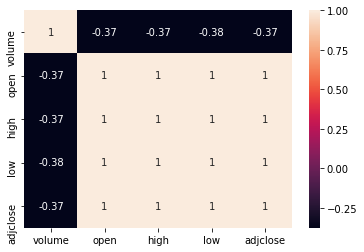

In [19]:
# Heat map of the dataset.
corr_map = df_amazon.corr()
sns.heatmap(corr_map, annot=True)

Text(0.5,1,'Opening price AMZN')

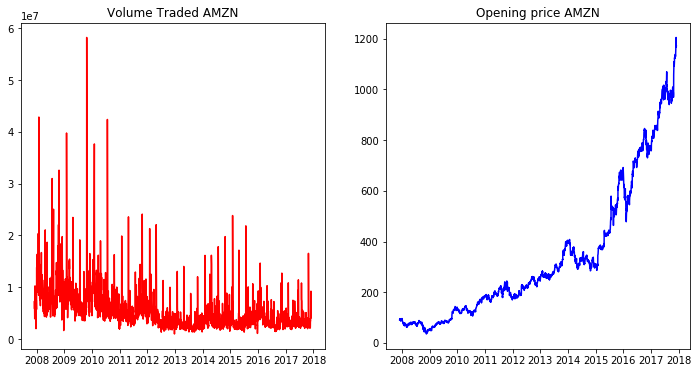

In [20]:
# Subplots of the Volume traded, Opening price.  
fig_amzn, axes_amzn = plt.subplots(1,2, figsize=(12,6))

axes_amzn[0].plot(df_amazon['volume'], 'r')
axes_amzn[0].set_title("Volume Traded AMZN")

axes_amzn[1].plot(df_amazon['open'], 'b')
axes_amzn[1].set_title("Opening price AMZN")




Text(0.5,1,'Lowest price traded per day AMZN')

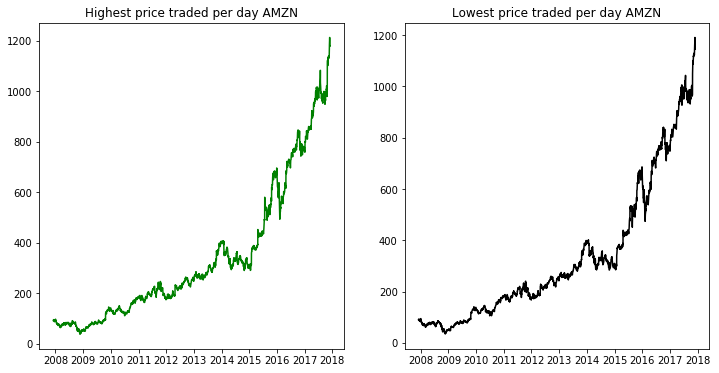

In [21]:
#Highest price per day, lowest price per day,
fig_amzn1, axes_amzn1 = plt.subplots(1,2, figsize=(12,6))

axes_amzn1[0].plot(df_amazon['high'], 'g')
axes_amzn1[0].set_title("Highest price traded per day AMZN")

axes_amzn1[1].plot(df_amazon['low'], 'k')
axes_amzn1[1].set_title("Lowest price traded per day AMZN")


Text(0.5,1,'Closing Price per day AMZN')

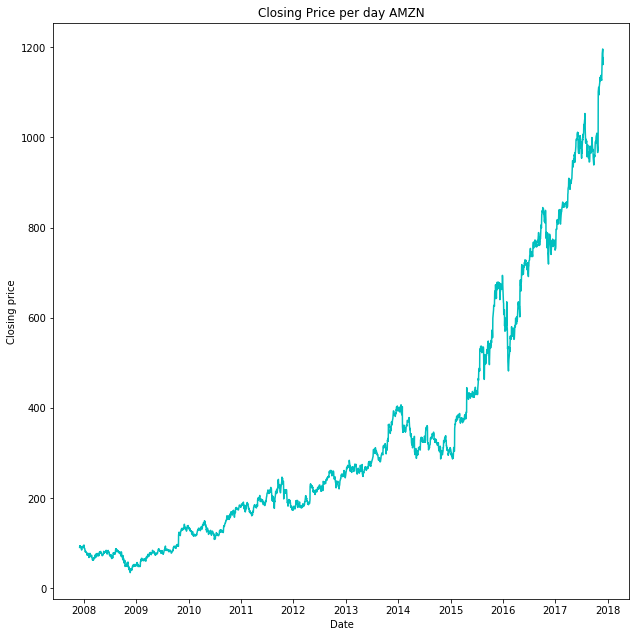

In [22]:
fig_amz2 = plt.figure(figsize=(8,8))

axes_amzn2 = fig_amz2.add_axes((1,1,1,1))

axes_amzn2.plot(df_amazon['adjclose'],'c')
axes_amzn2.set_xlabel('Date')
axes_amzn2.set_ylabel('Closing price')
axes_amzn2.set_title("Closing Price per day AMZN")

From the figure above, one can see a exponential rise of amazon's stock price between the period of 2008 and 2017. The machine learning algorithms presented within this notebook do not take into account of news articles 

The data was normalized for logistic regression algorithm. This was done to improve the accurracy of the results.

In [23]:
# Standardized the dataset using standard scaler library.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_amzn_scaled = scaler.fit(df_amazon)
df_amzn_scaled = scaler.transform(df_amazon)
print("The size of transformed data set.", np.shape(df_amazon))

The size of transformed data set. (2519, 5)


Logistic regression will be used to predict whether the stock price will either rise or fall the next day. 

In [24]:
# Now to parse the data to usable numpy forms for the Machine Learning Algorithms.
# Firstly, the author will use the Logistic regression to predict whether there will be a drop or gain in the stock.
# The classification will be done by taking the difference of the adjusted closing - opening price and assigning -1 for loss
# or +1 for gain. This assumption does not take into account of the highs, lows or volume features within the dataset.
amazon_features = df_amazon.iloc[:,:]
amazon_features = amazon_features.values

X_amazon = df_amzn_scaled[:,0:4]
Y_amazon = df_amzn_scaled[:,4]

label_gol = amazon_features[:,1] - amazon_features[:,4] # label variable to indicate whether a gain or loss for that day.

for i in range(len(label_gol)):
    if label_gol[i] < 0:
        label_gol[i] = -1
    else:
        label_gol[i] = 1
          
print("This vector contains the labels for gain or loss per day.",(label_gol))


This vector contains the labels for gain or loss per day. [-1. -1.  1. ...  1. -1.  1.]


In [25]:
# Now to break it down to training and testing. These splits will be done as 80/20, 60/20, 40/20, 20/20 training vs 
# testing set respectively. The 
xx_80, xx_60, xx_40, xx_20 = int(len(label_gol)*0.8),int(len(label_gol)*0.6),int(len(label_gol)*0.4),int(len(label_gol)*0.2)

xtrainlog80, xtrainlog60 = X_amazon[0:xx_80,:], X_amazon[0:xx_60,:]
xtrainlog40, xtrainlog20 = X_amazon[0:xx_40,:], X_amazon[0:xx_20,:]

ytrainlog80, ytrainlog60 = label_gol[0:xx_80], label_gol[0:xx_60]
ytrainlog40, ytrainlog20 = label_gol[0:xx_40], label_gol[0:xx_20]

xtestlog, ytestlog = X_amazon[xx_80:len(label_gol),:], label_gol[xx_80:len(label_gol)]

In [26]:
from sklearn.linear_model import LogisticRegression
log_modelscaled80 = LogisticRegression()
log_modelscaled60 = LogisticRegression()
log_modelscaled40 = LogisticRegression()
log_modelscaled20 = LogisticRegression()

log_modelscaled80.fit(xtrainlog80,ytrainlog80)
log_modelscaled60.fit(xtrainlog60,ytrainlog60)
log_modelscaled40.fit(xtrainlog40,ytrainlog40)
log_modelscaled20.fit(xtrainlog20,ytrainlog20)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
pred_scaled80 = log_modelscaled80.predict(xtestlog)
pred_scaled60 = log_modelscaled60.predict(xtestlog)
pred_scaled40 = log_modelscaled40.predict(xtestlog)
pred_scaled20 = log_modelscaled20.predict(xtestlog)


In [28]:
from sklearn.metrics import classification_report
print('Classification report 80: \n')
print(classification_report(ytestlog,pred_scaled80))

print('Classification report 60: \n')
print(classification_report(ytestlog,pred_scaled60))

print('Classification report 40: \n')
print(classification_report(ytestlog,pred_scaled40))

print('Classification report 20: \n')
print(classification_report(ytestlog,pred_scaled20))

Classification report 80: 

             precision    recall  f1-score   support

       -1.0       0.49      1.00      0.65       244
        1.0       1.00      0.00      0.01       260

avg / total       0.75      0.49      0.32       504

Classification report 60: 

             precision    recall  f1-score   support

       -1.0       0.48      1.00      0.65       244
        1.0       0.00      0.00      0.00       260

avg / total       0.23      0.48      0.32       504

Classification report 40: 

             precision    recall  f1-score   support

       -1.0       0.48      1.00      0.65       244
        1.0       0.00      0.00      0.00       260

avg / total       0.23      0.48      0.32       504

Classification report 20: 

             precision    recall  f1-score   support

       -1.0       0.48      1.00      0.65       244
        1.0       0.00      0.00      0.00       260

avg / total       0.23      0.48      0.32       504



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix of the predictions 80/20 split: \n ")
print(confusion_matrix(ytestlog,pred_scaled80))

print("Confusion matrix of the predictions 60/20 split: \n ")
print(confusion_matrix(ytestlog,pred_scaled60))

print("Confusion matrix of the predictions 40/20 split: \n ")
print(confusion_matrix(ytestlog,pred_scaled40))

print("Confusion matrix of the predictions 20/20 split: \n ")
print(confusion_matrix(ytestlog,pred_scaled20))

Confusion matrix of the predictions 80/20 split: 
 
[[244   0]
 [259   1]]
Confusion matrix of the predictions 60/20 split: 
 
[[244   0]
 [260   0]]
Confusion matrix of the predictions 40/20 split: 
 
[[244   0]
 [260   0]]
Confusion matrix of the predictions 20/20 split: 
 
[[244   0]
 [260   0]]


In [30]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

f_pr80, t_pr80, thresholds8 = roc_curve(ytestlog, pred_scaled80)
f_pr60, t_pr60, thresholds6 = roc_curve(ytestlog, pred_scaled60)
f_pr40, t_pr40, thresholds4 = roc_curve(ytestlog, pred_scaled40)
f_pr20, t_pr20, thresholds2 = roc_curve(ytestlog, pred_scaled20)

print("ROC area under the curve 80/20 split: \n",auc(f_pr80,t_pr80))
print("ROC area under the curve 60/20 split: \n",auc(f_pr60,t_pr60))
print("ROC area under the curve 40/20 split: \n",auc(f_pr40,t_pr40))
print("ROC area under the curve 20/20 split: \n",auc(f_pr20,t_pr20))

ROC area under the curve 80/20 split: 
 0.5019230769230769
ROC area under the curve 60/20 split: 
 0.5
ROC area under the curve 40/20 split: 
 0.5
ROC area under the curve 20/20 split: 
 0.5


Now that was for all the features. What if I only have the opening data to base my prediction on? Let's use Logistic regression using the opening price.

In [31]:
xopenlog, yopenlog = X_amazon[0:xx_80,1], label_gol[0:xx_80]
xtestopen = X_amazon[xx_80:len(label_gol),1]

xopenlog = np.reshape(xopenlog, (-1,1))
xtestopen = np.reshape(xtestopen, (-1,1))

log_modelscaledopen = LogisticRegression()
log_modelscaledopen.fit(xopenlog,yopenlog)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
pred_scaledopen = log_modelscaledopen.predict(xtestopen)

print('Classification report opening: \n')
print(classification_report(ytestlog,pred_scaledopen))

print("Confusion matrix of the predictions opening: \n ")
print(confusion_matrix(ytestlog,pred_scaledopen))



Classification report opening: 

             precision    recall  f1-score   support

       -1.0       0.00      0.00      0.00       244
        1.0       0.52      1.00      0.68       260

avg / total       0.27      0.52      0.35       504

Confusion matrix of the predictions opening: 
 
[[  0 244]
 [  0 260]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Just given the opening price, logistic regression is not a suitable way to reliably predict the gain and loss per day of the stock price.

ARIMA model for predicting the price.

In [33]:
# Auto Regression Integrated Moving Average (ARIMA) model.
# Import the libraries
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


Derive the nature of the data whether it is stationary or not.

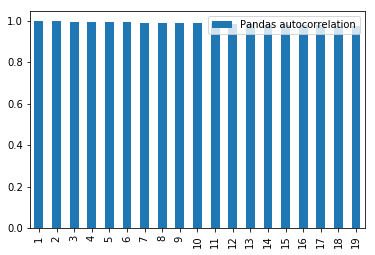

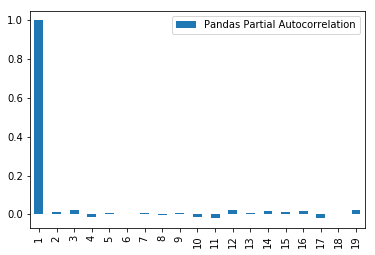

In [34]:
# Take the natural logarithms of the closing price.
amzn_cprice = amazon_features[:,4]
ln_amznprice = np.log(amzn_cprice)

# acf and pacf are the autocorrelation and partial autocorrelation of the signal.
# Plot of the autocorrelation of the closing price.
acf_amzn = acf(ln_amznprice, fft=True)[1:20]

# Bar plot of the autocorrelation.
test_acf = pd.DataFrame([acf_amzn]).T
test_acf.columns = ['Pandas autocorrelation']
test_acf.index += 1
test_acf.plot(kind='bar')
plt.show()

# plot of the partial autocorrelation
pacf_amzn = pacf(ln_amznprice)[1:20]
test_pacf = pd.DataFrame([pacf_amzn]).T
test_pacf.columns = ['Pandas Partial Autocorrelation']
test_pacf.index += 1
test_pacf.plot(kind='bar')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2517
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -8584.589
Method:                       css-mle   S.D. of innovations              7.328
Date:                Thu, 07 Jun 2018   AIC                          17175.178
Time:                        14:29:18   BIC                          17192.670
Sample:                             1   HQIC                         17181.526
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4316      0.150      2.881      0.004       0.138       0.725
ma.L1.D.y      0.0257      0.020      1.266      0.205      -0.014       0.065
                                    Roots           

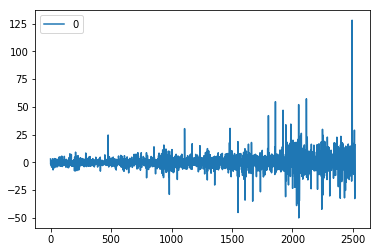

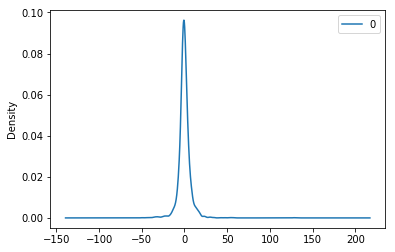

                 0
count  2517.000000
mean     -0.000032
std       7.329470
min     -50.116488
25%      -2.760989
50%      -0.301650
75%       2.546514
max     128.109372


In [35]:
# Since the data follows an AutoCorrelation of 1; it is non-stationary process. Therefore it has constant mean, variance
# and autocorrelation.
# Now the parameters of the model are (0,1,0). These will be tuned later.
# Now to do the Rolling Forecast ARIMA model.
x_arima = amazon_features[:,4]
size_train = int(len(x_arima)*0.7)
#print(size_train)
train_arima, test_arima = x_arima[0:size_train], x_arima[size_train:len(x_arima)]
xx_axis_values = np.arange(len(test_arima))
hist = [x for x in train_arima]

pred_arima = list()

for i in range(len(test_arima)):
    model_arima = ARIMA(hist, order=(0,1,1)) # calling on the library.
    model_arima_fit = model_arima.fit(disp=0)
    output_arima = model_arima_fit.forecast()
    y_test = output_arima[0]
    pred_arima.append(y_test)
    observed = test_arima[i]
    hist.append(observed)
    #print('Predicted = %f, expected = %f' % (y_test, observed))    

print(model_arima_fit.summary())

residuals = pd.DataFrame(model_arima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Text(0.5,1,'Closing price predicted AMZN')

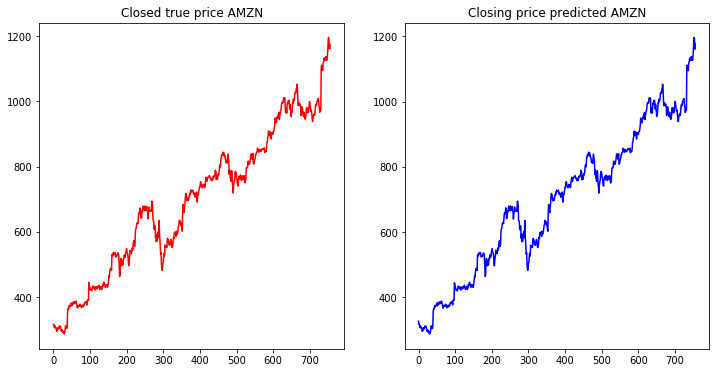

In [36]:
fig_sub, axes_sub = plt.subplots(1,2, figsize=(12,6))

axes_sub[0].plot(xx_axis_values,test_arima, 'r')
axes_sub[0].set_title("Closed true price AMZN")

axes_sub[1].plot(xx_axis_values,pred_arima, 'b')
axes_sub[1].set_title("Closing price predicted AMZN")



Text(0.5,1,'Predicted vs true values.')

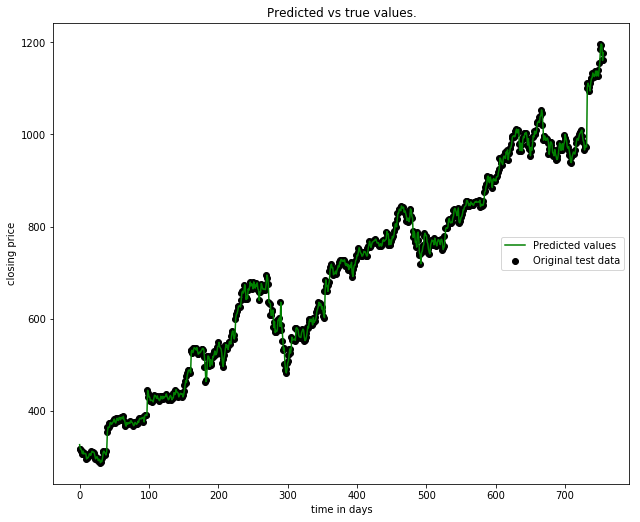

In [37]:
# Plotting of the testing data and predictions.
fig_arima = plt.figure(figsize=(10,8), facecolor='#FFFFFF')
left, bottom, width, height = 0.8, 0.8, 0.8, 0.8
ax_arima = fig_arima.add_axes((left, bottom, width, height))

ax_arima.scatter(xx_axis_values,test_arima, color = 'black', label = 'Original test data')
ax_arima.plot(xx_axis_values,pred_arima, color='green', label = 'Predicted values')
ax_arima.set_xlabel("time in days")
ax_arima.set_ylabel("closing price")

ax_arima.legend(loc='right')
ax_arima.set_title("Predicted vs true values.")


In [76]:
# Checking the variance of the between the true.

from sklearn.metrics import explained_variance_score
pred_arima = np.array(pred_arima)

print("The variance score between the true closing value and predicted closing value: \n")
print(explained_variance_score(test_arima, pred_arima))

# Print the last 20 predicted values 
print("The last 20 values of the predicted values: \n")
print(pred_arima[736:756])
print(" ")
# Print the last 20 True values 
print("The last 20 values of the True closing price: \n")
print(test_arima[736:756])

The variance score between the true closing value and predicted closing value: 

0.9973024568460029
The last 20 values of the predicted values: 

[[1094.38286098]
 [1112.40415286]
 [1121.27063164]
 [1123.62879371]
 [1133.5218854 ]
 [1129.43926923]
 [1125.66421606]
 [1129.66894388]
 [1137.43156483]
 [1126.84876339]
 [1137.94515702]
 [1130.11575257]
 [1126.63740664]
 [1140.19060123]
 [1156.96093905]
 [1187.22237683]
 [1196.51777127]
 [1193.95434993]
 [1160.72694986]
 [1177.58910368]]
 
The last 20 values of the True closing price: 

[1111.6  1120.66 1123.17 1132.88 1129.13 1125.35 1129.17 1136.84 1126.69
 1137.29 1129.88 1126.31 1139.49 1156.16 1186.   1195.83 1193.6  1161.27
 1176.75 1162.35]


The Ridge Regression Model. I am performing the same splits as I did in the Logistic Regression Model.

In [39]:
from sklearn.linear_model import Ridge
x_ridge = amazon_features[:,1]
y_ridge = amazon_features[:,4]

size_split8 = int(len(y_ridge)* 0.8)
size_split6 = int(len(y_ridge)* 0.6)
size_split4 = int(len(y_ridge)* 0.4)
size_split2 = int(len(y_ridge)* 0.2)

xtrainridge8, xtestridge = x_ridge[0:size_split8], x_ridge[size_split8:len(y_ridge)]
ytrainridge8, ytestridge = y_ridge[0:size_split8], y_ridge[size_split8:len(y_ridge)]
xtrainridge6, ytrainridge6 = x_ridge[0:size_split6], y_ridge[0:size_split6]
xtrainridge4, ytrainridge4 = x_ridge[0:size_split4], y_ridge[0:size_split4]
xtrainridge2, ytrainridge2 = x_ridge[0:size_split2], y_ridge[0:size_split2]

xtrainridge8 = np.reshape(xtrainridge8, (-1,1))
xtrainridge6 = np.reshape(xtrainridge6, (-1,1))
xtrainridge4 = np.reshape(xtrainridge4, (-1,1))
xtrainridge2 = np.reshape(xtrainridge2, (-1,1))

xtestridge = np.reshape(xtestridge, (-1,1))

xx_ridge = np.arange(len(ytestridge))# plotting purposes.

In [40]:
ridge_fit8 = Ridge(alpha=1)
ridge_fit6 = Ridge(alpha=1)
ridge_fit4 = Ridge(alpha=1)
ridge_fit2 = Ridge(alpha=1)

clf8 = ridge_fit8.fit(xtrainridge8, ytrainridge8)
clf6 = ridge_fit6.fit(xtrainridge6, ytrainridge6)
clf4 = ridge_fit4.fit(xtrainridge4, ytrainridge4)
clf2 = ridge_fit2.fit(xtrainridge2, ytrainridge2)

In [41]:
pred_ridge8 = ridge_fit8.predict(xtestridge)
pred_ridge6 = ridge_fit6.predict(xtestridge)
pred_ridge4 = ridge_fit4.predict(xtestridge)
pred_ridge2 = ridge_fit2.predict(xtestridge)

MSE_error8 = mean_squared_error(ytestridge, pred_ridge8)
MSE_error6 = mean_squared_error(ytestridge, pred_ridge6)
MSE_error4 = mean_squared_error(ytestridge, pred_ridge4)
MSE_error2 = mean_squared_error(ytestridge, pred_ridge2)

print("Mean Squared Error of the ridge regression 80/20 split: % 3f" % MSE_error8)
print("Mean Squared Error of the ridge regression 60/20 split: % 3f" % MSE_error6)
print("Mean Squared Error of the ridge regression 40/20 split: % 3f" % MSE_error4)
print("Mean Squared Error of the ridge regression 20/20 split: % 3f" % MSE_error2)

Mean Squared Error of the ridge regression 80/20 split:  86.317417
Mean Squared Error of the ridge regression 60/20 split:  86.167275
Mean Squared Error of the ridge regression 40/20 split:  87.158731
Mean Squared Error of the ridge regression 20/20 split:  95.178668


Text(0.5,1,'True value')

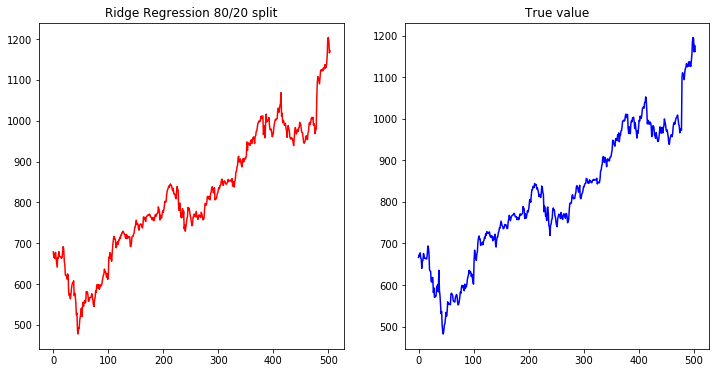

In [42]:
fig_sub1, axes_sub1 = plt.subplots(1,2, figsize=(12,6))

axes_sub1[0].plot(xx_ridge,pred_ridge8, 'r')
axes_sub1[0].set_title("Ridge Regression 80/20 split")

axes_sub1[1].plot(xx_ridge,ytestridge, 'b')
axes_sub1[1].set_title("True value")


Text(0.5,1,'True value')

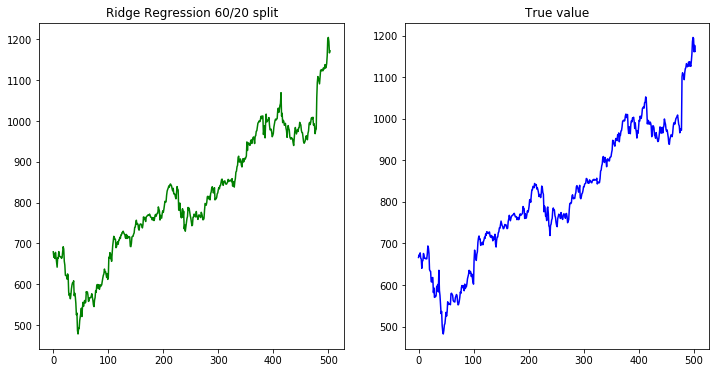

In [43]:
fig_sub2, axes_sub2 = plt.subplots(1,2, figsize=(12,6))

axes_sub2[0].plot(xx_ridge,pred_ridge6, 'g')
axes_sub2[0].set_title("Ridge Regression 60/20 split")

axes_sub2[1].plot(xx_ridge,ytestridge, 'b')
axes_sub2[1].set_title("True value")


Text(0.5,1,'True value')

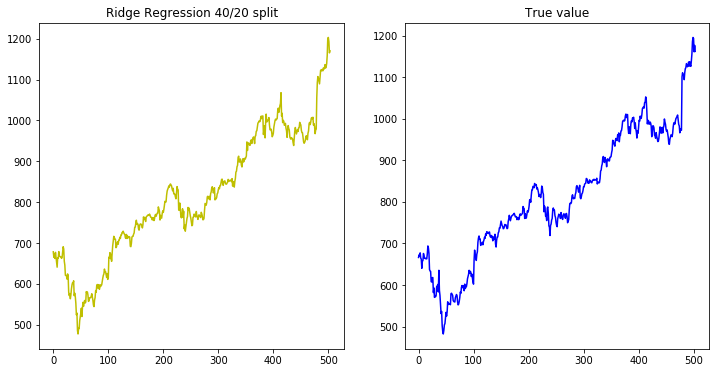

In [44]:
fig_sub3, axes_sub3 = plt.subplots(1,2, figsize=(12,6))

axes_sub3[0].plot(xx_ridge,pred_ridge4, 'y')
axes_sub3[0].set_title("Ridge Regression 40/20 split")

axes_sub3[1].plot(xx_ridge,ytestridge, 'b')
axes_sub3[1].set_title("True value")

Text(0.5,1,'True value')

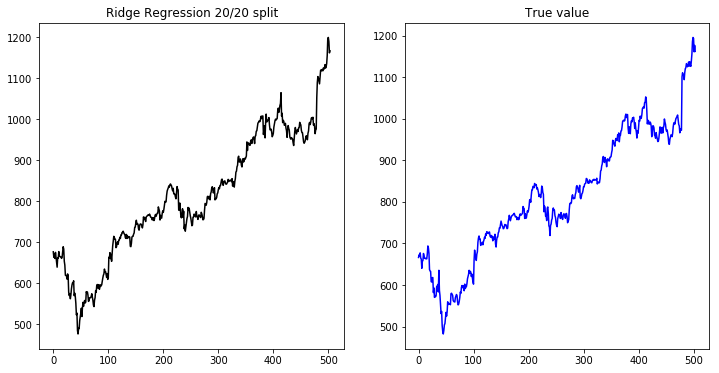

In [45]:
fig_sub4, axes_sub4 = plt.subplots(1,2, figsize=(12,6))

axes_sub4[0].plot(xx_ridge,pred_ridge2, 'k')
axes_sub4[0].set_title("Ridge Regression 20/20 split")

axes_sub4[1].plot(xx_ridge,ytestridge, 'b')
axes_sub4[1].set_title("True value")

In [46]:
print("The variance score between the true closing value and predicted closing value 80\20 split: \n")
print(explained_variance_score(ytestridge, pred_ridge8))

print("The variance score between the true closing value and predicted closing value 60\20 split: \n")
print(explained_variance_score(ytestridge, pred_ridge6))

print("The variance score between the true closing value and predicted closing value 40\20 split: \n")
print(explained_variance_score(ytestridge, pred_ridge4))

print("The variance score between the true closing value and predicted closing value 20\20 split: \n")
print(explained_variance_score(ytestridge, pred_ridge2))



The variance score between the true closing value and predicted closing value 80 split: 

0.996464279197614
The variance score between the true closing value and predicted closing value 60 split: 

0.9964618931307041
The variance score between the true closing value and predicted closing value 40 split: 

0.9964656229419728
The variance score between the true closing value and predicted closing value 20 split: 

0.9964617894855773


In [47]:
print("list of last 20 values of the predicted values: \n")
print(pred_ridge8[484:505])

print("list of the last 20 values of the true values: \n")
print(ytestridge[484:505])

list of last 20 values of the predicted values: 

[1090.23514173 1108.21436852 1123.78637661 1121.86859242 1125.00496865
 1125.14480708 1122.04838468 1129.15017927 1126.05375688 1129.20012156
 1137.31075054 1128.81057165 1131.89700558 1140.02761147 1159.70487635
 1201.61645169 1203.83388966 1193.76552266 1166.09749032 1171.04177769]
list of the last 20 values of the true values: 

[1111.6  1120.66 1123.17 1132.88 1129.13 1125.35 1129.17 1136.84 1126.69
 1137.29 1129.88 1126.31 1139.49 1156.16 1186.   1195.83 1193.6  1161.27
 1176.75 1162.35]
